## Key Requirements for the iRF scikit-learn implementation

* The following is a documentation of the main requirements for the iRF implementation

## Typical Setup


### Import the required dependencies

* In particular `irf_utils` and `irf_jupyter_utils`

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
import numpy as np
from functools import reduce

# Needed for the scikit-learn wrapper function
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from math import ceil

# Import our custom utilities
from imp import reload
from utils import irf_jupyter_utils
from utils import irf_utils
reload(irf_jupyter_utils)
reload(irf_utils)

<module 'utils.irf_utils' from '/home/runjing_liu/Documents/iRF/scikit-learn-sandbox/jupyter/utils/irf_utils.py'>

## Step 1: Fit the Initial Random Forest

* Just fit every feature with equal weights per the usual random forest code e.g. DecisionForestClassifier in scikit-learn

In [37]:
load_breast_cancer = load_breast_cancer()

In [56]:
X_train, X_test, y_train, y_test, rf = irf_jupyter_utils.generate_rf_example(n_estimators=20, 
                                                                             feature_weight=None)

## Check out the data

In [39]:
print("Training feature dimensions", X_train.shape, sep = ":\n")
print("\n")
print("Training outcome dimensions", y_train.shape, sep = ":\n")
print("\n")
print("Test feature dimensions", X_test.shape, sep = ":\n")
print("\n")
print("Test outcome dimensions", y_test.shape, sep = ":\n")
print("\n")
print("first 2 rows of the training set features", X_train[:2], sep = ":\n")
print("\n")
print("first 2 rows of the training set outcomes", y_train[:2], sep = ":\n")

Training feature dimensions:
(512, 30)


Training outcome dimensions:
(512,)


Test feature dimensions:
(57, 30)


Test outcome dimensions:
(57,)


first 2 rows of the training set features:
[[  1.98900000e+01   2.02600000e+01   1.30500000e+02   1.21400000e+03
    1.03700000e-01   1.31000000e-01   1.41100000e-01   9.43100000e-02
    1.80200000e-01   6.18800000e-02   5.07900000e-01   8.73700000e-01
    3.65400000e+00   5.97000000e+01   5.08900000e-03   2.30300000e-02
    3.05200000e-02   1.17800000e-02   1.05700000e-02   3.39100000e-03
    2.37300000e+01   2.52300000e+01   1.60500000e+02   1.64600000e+03
    1.41700000e-01   3.30900000e-01   4.18500000e-01   1.61300000e-01
    2.54900000e-01   9.13600000e-02]
 [  2.01800000e+01   1.95400000e+01   1.33800000e+02   1.25000000e+03
    1.13300000e-01   1.48900000e-01   2.13300000e-01   1.25900000e-01
    1.72400000e-01   6.05300000e-02   4.33100000e-01   1.00100000e+00
    3.00800000e+00   5.24900000e+01   9.08700000e-03   2.71500000e-02
  

## Step 2: Get all Random Forest and Decision Tree Data

* Extract in a single dictionary the random forest data and for all of it's decision trees
* This is as required for RIT purposes

In [40]:
all_rf_tree_data = irf_utils.get_rf_tree_data(
    rf=rf, X_train=X_train, X_test=X_test, y_test=y_test)

## STEP 3: Get the RIT data and produce RITs

In [41]:
np.random.seed(12)
all_rit_tree_data = irf_utils.get_rit_tree_data(
    all_rf_tree_data=all_rf_tree_data,
    bin_class_type=1,
    M=100,
    max_depth=2,
    noisy_split=False,
    num_splits=2)

# Perform Manual CHECKS on the `irf_utils`
* These should be converted to unit tests and checked with `nosetests -v test_irf_utils.py`

# Step 4: Plot some Data

### List Ranked Feature Importances

In [42]:
# Print the feature ranking
print("Feature ranking:")

feature_importances_rank_idx = all_rf_tree_data['feature_importances_rank_idx']
feature_importances = all_rf_tree_data['feature_importances']

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1
                                   , feature_importances_rank_idx[f]
                                   , feature_importances[feature_importances_rank_idx[f]]))

Feature ranking:
1. feature 22 (0.141571)
2. feature 23 (0.118066)
3. feature 27 (0.118023)
4. feature 20 (0.116496)
5. feature 7 (0.083462)
6. feature 3 (0.053727)
7. feature 2 (0.046495)
8. feature 0 (0.046333)
9. feature 6 (0.046172)
10. feature 13 (0.037305)
11. feature 26 (0.033145)
12. feature 21 (0.018278)
13. feature 25 (0.015116)
14. feature 5 (0.014100)
15. feature 10 (0.013705)
16. feature 1 (0.012798)
17. feature 24 (0.011960)
18. feature 12 (0.011029)
19. feature 28 (0.009534)
20. feature 29 (0.006791)
21. feature 4 (0.006139)
22. feature 16 (0.005647)
23. feature 17 (0.005003)
24. feature 14 (0.004568)
25. feature 11 (0.004414)
26. feature 18 (0.004412)
27. feature 19 (0.004295)
28. feature 15 (0.003972)
29. feature 9 (0.003792)
30. feature 8 (0.003654)


### Plot Ranked Feature Importances

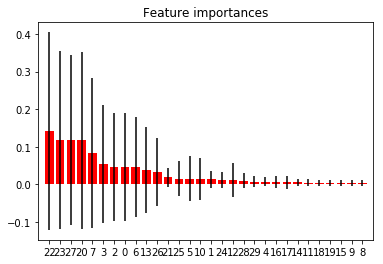

In [43]:
# Plot the feature importances of the forest
feature_importances_std = all_rf_tree_data['feature_importances_std']

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1])
        , feature_importances[feature_importances_rank_idx]
        , color="r"
        , yerr = feature_importances_std[feature_importances_rank_idx], align="center")
plt.xticks(range(X_train.shape[1]), feature_importances_rank_idx)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Decision Tree 0 (First) - Get output

### Check the output against the decision tree graph

In [44]:
# Now plot the trees individually
#irf_jupyter_utils.draw_tree(decision_tree = all_rf_tree_data['rf_obj'].estimators_[0])

## Compare to our dict of extracted data from the tree

In [45]:
#irf_jupyter_utils.pretty_print_dict(inp_dict = all_rf_tree_data['dtree0'])

In [46]:
# Count the number of samples passing through the leaf nodes
sum(all_rf_tree_data['dtree0']['tot_leaf_node_values'])

512

### Check output against the diagram

In [47]:
#irf_jupyter_utils.pretty_print_dict(inp_dict = all_rf_tree_data['dtree0']['all_leaf_paths_features'])

# Run the iRF function

In [48]:
all_rf_weights, all_K_iter_rf_data, all_rf_bootstrap_output, all_rit_bootstrap_output, stability_score =\
irf_utils.run_iRF(X_train=X_train,
        X_test=X_test,
        y_train=y_train,
        y_test=y_test,
        K=5,
        n_estimators=20,
        B=30,
        random_state_classifier=2018,
        propn_n_samples=.2,
        bin_class_type=1,
        M=20,
        max_depth=5,
        noisy_split=False,
        num_splits=2,
        n_estimators_bootstrap=5)


In [49]:
all_K_iter_rf_data['rf_iter1']['feature_importances_std']

array([  1.17370989e-02,   7.65485253e-03,   3.50243273e-03,
         8.55239388e-03,   3.64838213e-03,   0.00000000e+00,
         1.58059939e-01,   1.67038013e-01,   5.45548310e-05,
         3.03473961e-03,   2.85186993e-03,   0.00000000e+00,
         3.47262741e-03,   2.25011228e-03,   1.68434435e-03,
         0.00000000e+00,   9.20144905e-04,   3.66362643e-03,
         1.44133057e-03,   0.00000000e+00,   2.71356235e-01,
         2.54186595e-02,   3.55478999e-01,   2.88644422e-01,
         7.91716497e-03,   4.15066017e-03,   1.35126367e-02,
         2.06776415e-01,   8.09767440e-03,   3.53276537e-03])

# Examine the stability scores

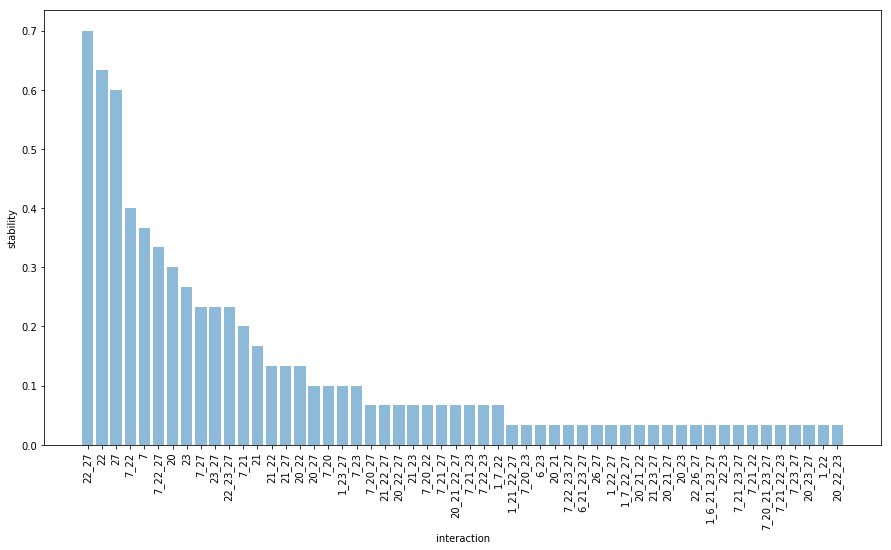

In [50]:
irf_utils._get_histogram(stability_score, sort = True)

# Examine feature importances
In particular, let us see how they change over the K iterations of random forest

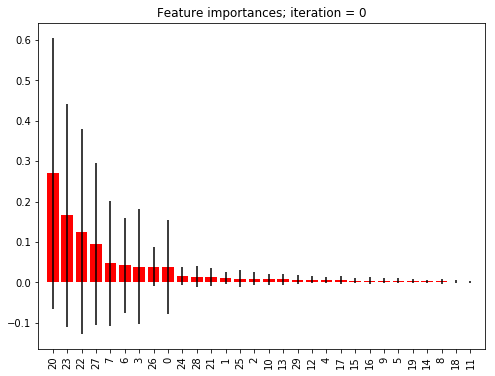

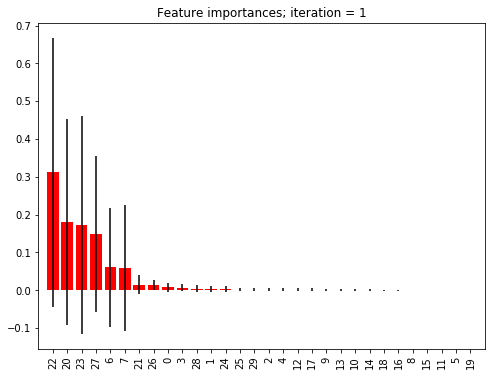

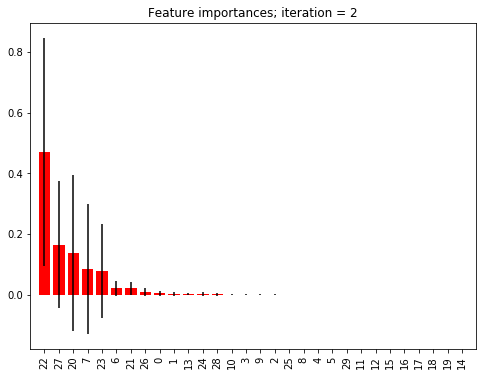

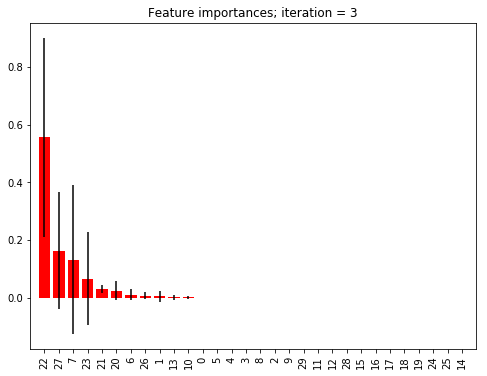

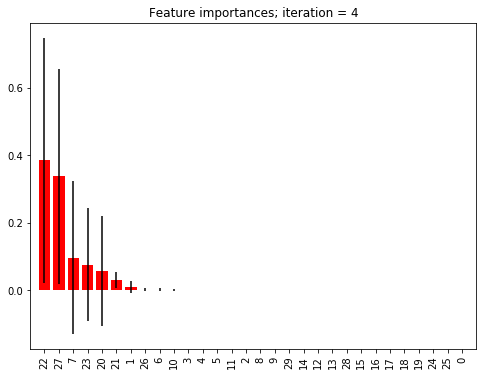

In [51]:
for k in range(5): 
    
    iteration = "rf_iter{}".format(k)
    
    feature_importances_std = all_K_iter_rf_data[iteration]['feature_importances_std']
    feature_importances_rank_idx = all_K_iter_rf_data[iteration]['feature_importances_rank_idx']
    feature_importances = all_K_iter_rf_data[iteration]['feature_importances']

    plt.figure(figsize=(8, 6))
    title = "Feature importances; iteration = {}".format(k)
    plt.title(title)
    plt.bar(range(X_train.shape[1])
            , feature_importances[feature_importances_rank_idx]
            , color="r"
            , yerr = feature_importances_std[feature_importances_rank_idx], align="center")
    plt.xticks(range(X_train.shape[1]), feature_importances_rank_idx, rotation='vertical')
    plt.xlim([-1, X_train.shape[1]])
    plt.show()
    
    
    

Note that after 5 iterations, the most important features were found to be 22, 27, 7, and 23. 

Now also recall that the most stable interactions were found to be '22_27', '7_22', '7_22_27', '23_27', '7_27', '22_23_27'

Given the overlap between these two plots, the results are not unreasonable here. 

## Run iRF for just 1 iteration - should be the uniform sampling version

This is just a sanity check: the feature importances from iRF after 1 iteration should match the feature importance from running a standard RF

In [52]:
all_K_iter_rf_data.keys()
print(all_K_iter_rf_data['rf_iter0']['feature_importances'])

[ 0.0378531   0.01143301  0.00917885  0.0389645   0.00570286  0.00355542
  0.04189169  0.04736217  0.00276282  0.00375928  0.00758323  0.00132309
  0.00668335  0.00753545  0.0027825   0.0043194   0.00388132  0.00557761
  0.00168787  0.00332904  0.26950483  0.01216281  0.12508337  0.16629184
  0.01540501  0.00929946  0.03860752  0.0959075   0.01366094  0.00691016]


Compare to the original single fitted random forest (top of the notebook)!

In [60]:
rf = RandomForestClassifier(n_estimators=20, random_state=2018)
rf.fit(X=X_train, y=y_train)
print(rf.feature_importances_)

[ 0.0378531   0.01143301  0.00917885  0.0389645   0.00570286  0.00355542
  0.04189169  0.04736217  0.00276282  0.00375928  0.00758323  0.00132309
  0.00668335  0.00753545  0.0027825   0.0043194   0.00388132  0.00557761
  0.00168787  0.00332904  0.26950483  0.01216281  0.12508337  0.16629184
  0.01540501  0.00929946  0.03860752  0.0959075   0.01366094  0.00691016]


And they match perfectly as expected. 

## These look like they match closely as required!

In [22]:
rf_weight5 = np.ndarray.tolist(all_rf_weights['rf_weight1'])
rf_weight5

[0.03785310470431957,
 0.011433014482771538,
 0.009178847665561797,
 0.038964497097170335,
 0.005702864300092174,
 0.0035554200305757616,
 0.041891686998428004,
 0.04736216645722789,
 0.0027628245777236277,
 0.003759277392257268,
 0.0075832267680531916,
 0.0013230930451214183,
 0.006683350681223972,
 0.007535448498366222,
 0.0027824980670987315,
 0.0043193967779257,
 0.0038813156721859963,
 0.005577613495435727,
 0.0016878723423762096,
 0.003329040950739148,
 0.2695048270955845,
 0.012162811436513673,
 0.1250833695561254,
 0.16629184413751788,
 0.015405008680302696,
 0.00929945634990437,
 0.03860751552331201,
 0.09590750167873455,
 0.013660944440826783,
 0.006910161096523803]

#

In [25]:
sorted([i for i, e in enumerate(rf_weight5) if e != 0])

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

## End Wrapper test